In [77]:
from sklearn.cluster import KMeans
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from datetime import time,timedelta


In [78]:
directory = './intensOcupation'

mySeries = []
namesofMySeries = []
counter=0
for filename in os.listdir(directory):

    if filename.endswith(".csv") :
        df = pd.read_csv(directory+"/"+filename)
        df = df.loc[:,["ocupacion"]]
        # While we are at it I just filtered the columns that we will be working on

        # ,set the date columns as index
        # and lastly, ordered the data according to our date index
        df.columns = range(df.shape[1])
        dim=len(df.to_numpy())
    

        mySeries.append(list(df.to_numpy().reshape(dim)[:287]))

        df = pd.read_csv(directory+"/"+filename)
        if(dim< 287):
           print(filename+ str(dim))




        namesofMySeries.append(filename)
        namesofMySeries.append(filename)
        counter+=1

#mySeries=np.array(mySeries,dtype=object)



In [131]:
k=7

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit(mySeries).predict(mySeries)
print(y_pred)
kmeans.cluster_centers_


[4 1 0 5 6 6 4 6 3 3 3 1 5 1 4 3 1 0 1 3 5 3 1 6 3 0 1 5 3 2 2 1 0 1 3 1 2
 1 3 1 3 5 3 6 3 3 3 6 3 3 1 3 1 5 1 3 6 2 1 2 0 3 5 5 2 0 6 5 4 3 6 4 6 1
 3 3 2 6 1 3 0 3 3 3 5 2 2 5 0 3 2 0 3 4 3 2 3 0 0 1 3 4 2 6 3 0 2 2 1 4 1
 1 2 6 0 5 4 3 1 5 2 1 3 2 3 2 3 5 3 2 2 2 1 5 6 1 3 3 3 2 2 6 1 3 1 6 0 5
 1 0 4 3 3 3 3 3 3 4 5 1 3 5 5 1 2 2 4 5 1 1 3 2 5 6 4 0 0 3 1 2 4 0 5 4 5
 0 3 3 3 1 5 1 6 3 1 0 3 3 5 6 3 3 6 3 2 5 4 2 5 3 3 5 2 1 3 2 3 1 2 3 2 5
 1 5 3 3 1 3 2 0 3 5 6 6 1 0 5 3 1 3 5 3 5 3 3 5 3 2 1 1 3 3 6 3 3 1 0 1 3
 1 3 0 2 3 0 1 2 4 3 3 5 6 1 3 4 6 6 6 6 3 5 4 1 0 1 1 3 0 5 5 1 0 6 2 1 3
 4 1 3 3 1 3 1 3 4 2 1 4 0 6 4 3 0 2 1 1 5 2 6 5 1 6 5 3 0 3 4 3 5 3 4 4 1
 4 0 3 3 3 6 5 3 6 2 1 6 3 5 5 1 4 5 5 5 6 2 0 5 3 0 4 6 6 3 3 3 3 3 0 5 6
 5 4 3 2 4 1 0 2 4 1 6 4 1 6 1 2 3 2 2 2 5 3 3 1 3 5 1 3 3 1 2 0 2 6 6 5 0
 1 5 3 1 5 3 1 1 6 2 0 3 2 1 6 5 5 6 5 6 2 1 0 6 3 3 1 0 3 3 5 2 5 1 3 1 3
 3 6 1 0 3 2 2 5 2 0 2 2 6 3 2 1 3 4 5 2 1 1 1 3 5 2 5 1 3 2 5 0 5 1 0 3 4
 5 3 5 5 4 6 2 2 1 5 3 3 

array([[1.97740905, 1.43631067, 1.3064835 , ..., 2.1284066 , 2.09711868,
        2.05016714],
       [1.75954829, 1.89941812, 1.87152267, ..., 1.92121391, 1.89709478,
        1.84041765],
       [0.40243902, 0.31263968, 0.31573908, ..., 0.54920735, 0.50444491,
        0.45683066],
       ...,
       [1.6188377 , 1.50819285, 1.45094699, ..., 1.82863273, 1.73615982,
        1.64124128],
       [1.20159367, 1.57874615, 1.60482264, ..., 1.42937043, 1.38219462,
        1.3326567 ],
       [1.59699863, 1.49909945, 1.46399326, ..., 1.75672484, 1.68095278,
        1.6280083 ]])

In [134]:
def plot_data():
    for m in mySeries:
        plt.plot(m, color='r',)


def plot_centroids():
    fig, axs = plt.subplots(7,1,figsize=(25,25))



    for m in range(len(mySeries)):
        axs[y_pred[m]].plot(mySeries[m],color='r')
    for m in range(len(kmeans.cluster_centers_)):
        axs[m].plot(kmeans.cluster_centers_[m], color='b',linewidth=3)
        df = pd.read_csv(directory+"/datAxes.csv")
        df = df.loc[:,["time", "value"]]
        df = df.dropna()  # elimina las filas con valores nulos

        # Calcular los índices equitativos
        indices = [i for i in range(0, len(df), len(df)//10)]

        # Establecer los valores de xticks
        xticks = [df.iloc[i]['time'] for i in indices]

        axs[m].plot(df['time'], df['value'], alpha=0)
        axs[m].set_xticks(xticks, rotation=90)




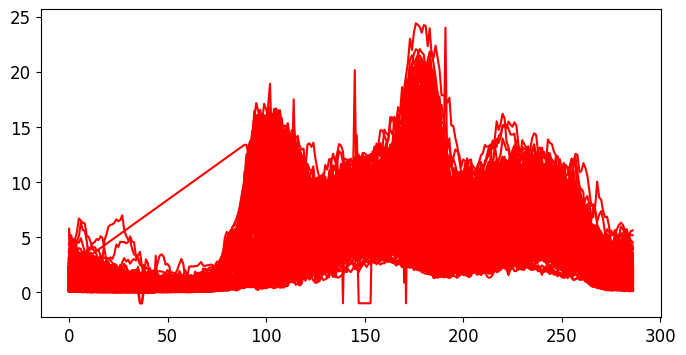

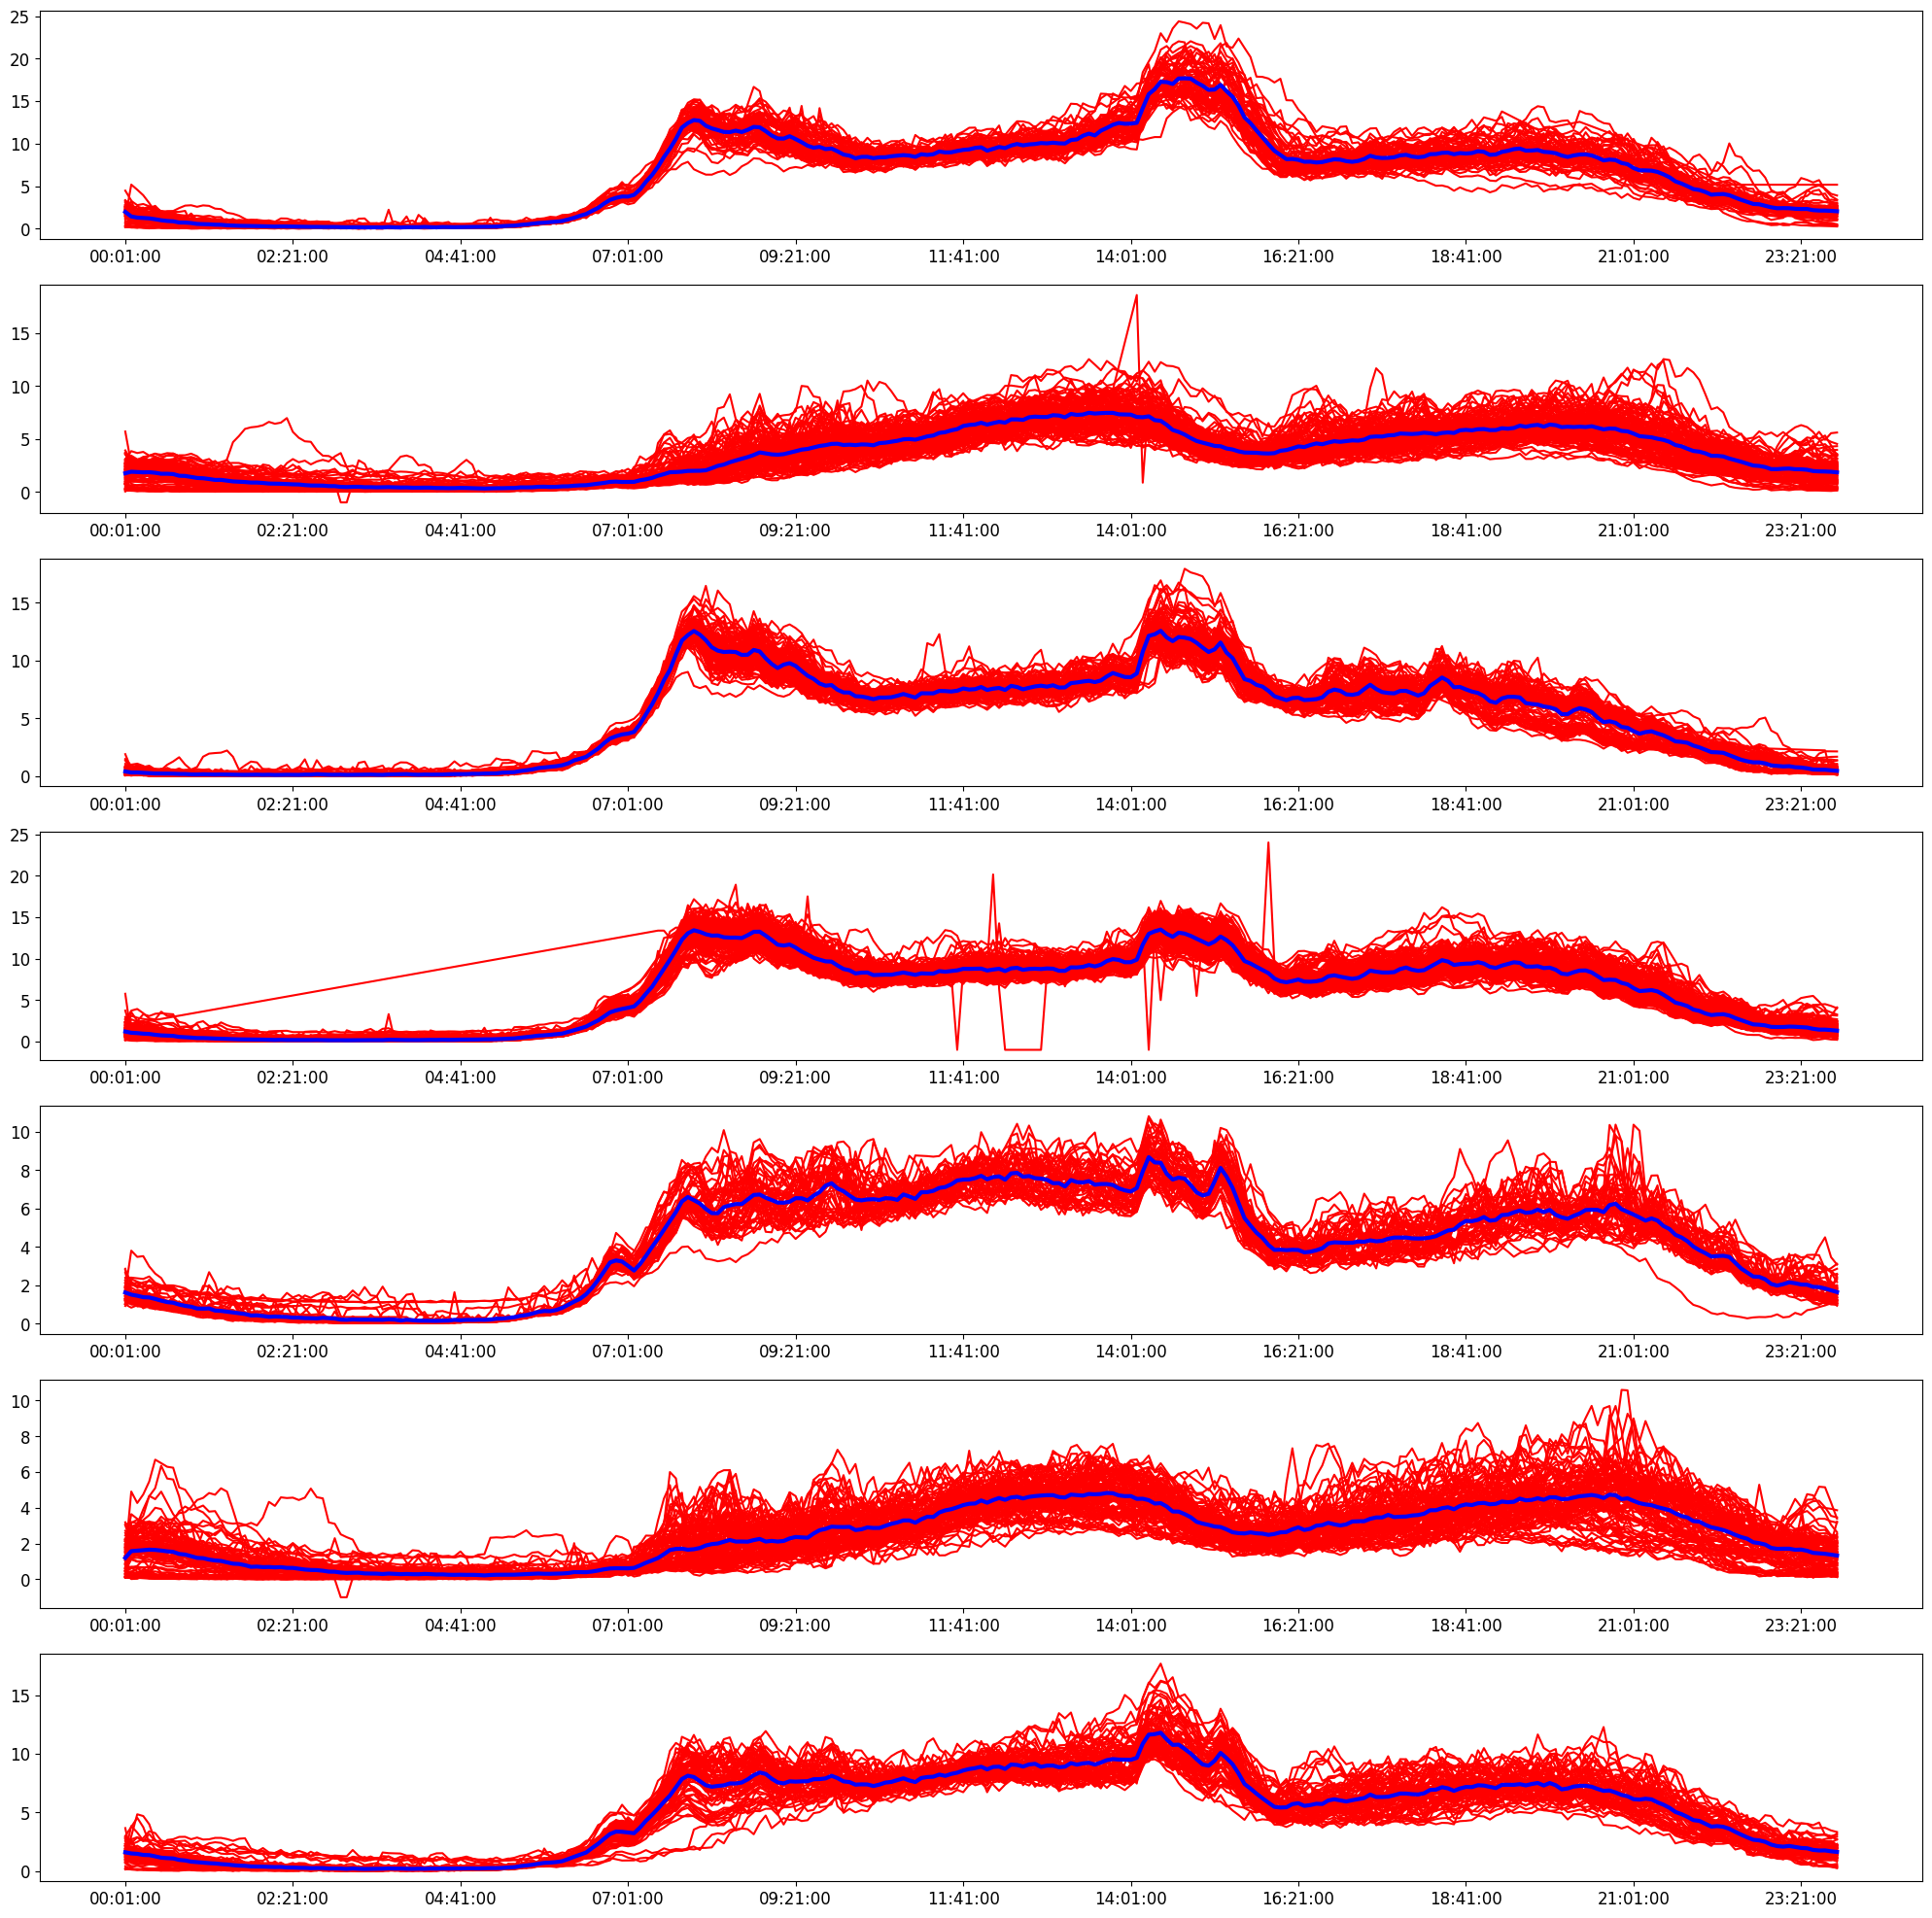

In [135]:
plt.figure(figsize=(8, 4))
plot_data()
plot_centroids()
#plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()


In [ ]:
directory = './intensOcupation'
containsNan=[]
for filename in os.listdir(directory):
    lines=open(directory+"/"+filename)
    for l in lines:
        if 'NaN' in l:
            containsNan.append(filename)
            pass
print(set(containsNan))

In [72]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(mySeries)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[971297.6344054475, 347431.9755804475, 273115.1408837815, 237687.05384356575, 214037.64983535273, 193101.15380452905, 181103.60381306222, 171413.1304869957, 164764.87081693206]


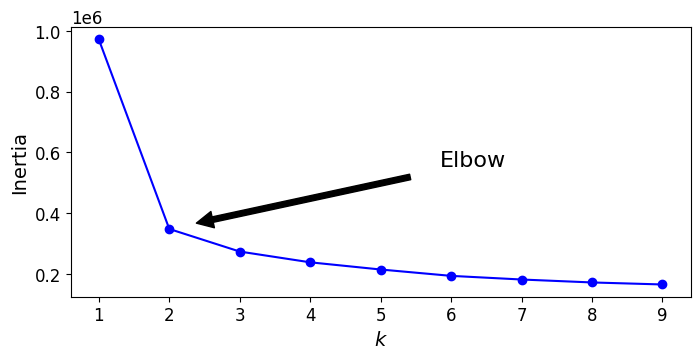

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42)]


In [73]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
plt.show()
print(kmeans_per_k)

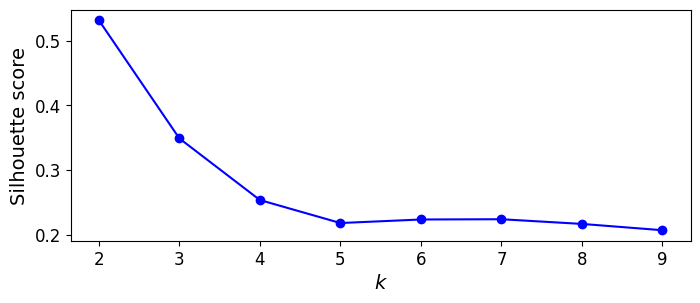

In [74]:
silhouette_scores = [silhouette_score(mySeries, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()


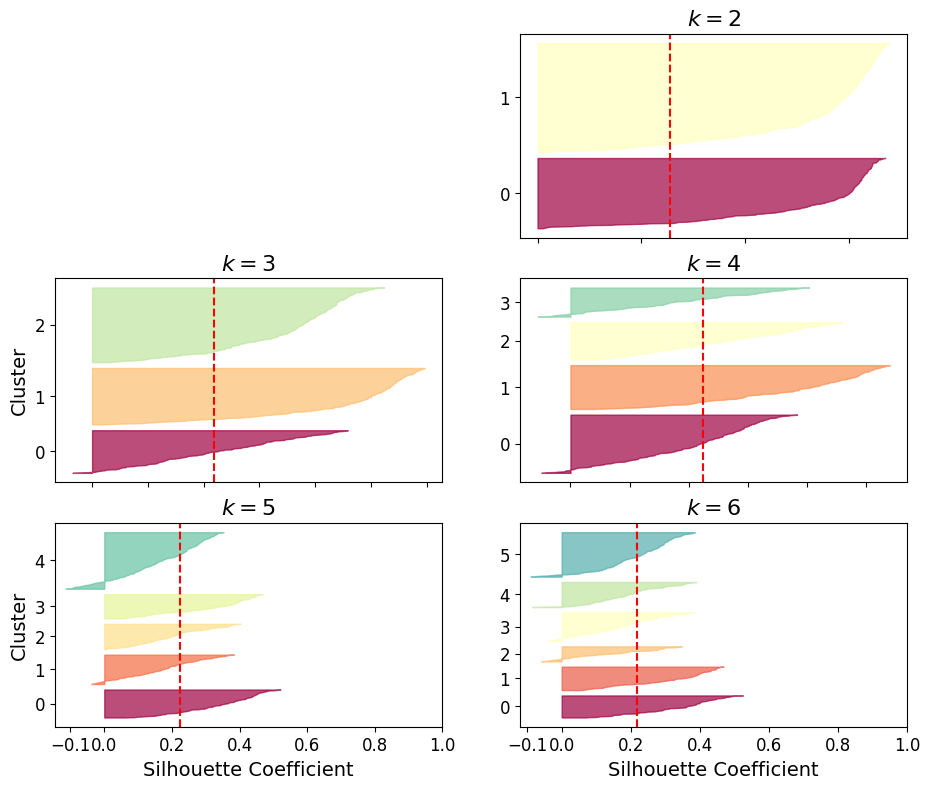

In [75]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2,3, 4,5,6):
    plt.subplot(3, 2, k )
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(mySeries, y_pred)

    padding = len(mySeries) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

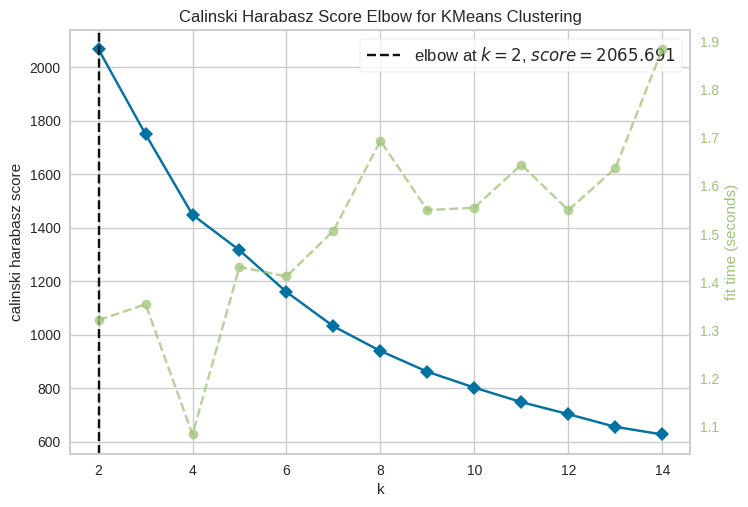

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
visualizer.fit(mySeries)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Interpolation

In [45]:
contiansNan=list(set(containsNan))

directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))

print(len(contiansNan))
for i in range(len(contiansNan)):


    df = pd.read_csv(directory+"/"+contiansNan[i])
    df = df.loc[:,["intensidad"]]
    newdf=df.interpolate(method='linear')



    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)
    

    axs[i, 0].set_title(contiansNan[i])
    axs[i, 1].set_title(contiansNan[i]+' interpolated')




plt.show()


20


In [144]:
directory = './intensOcupation'

for filename in os.listdir(directory):
    print(filename)
    
    df = pd.read_csv(directory+"/"+filename)
    df = df.loc[:,["intensidad"]]
    newdfIn=df.interpolate(method='linear')
    df = pd.read_csv(directory+"/"+filename)

    df = df.loc[:,["ocupacion"]]
    newdfOc=df.interpolate(method='linear')
  
    file=open(directory+"/"+filename,'w+')
    
    newdfIn.to_csv("archivo1.csv", index=False)
    newdfOc.to_csv("archivo2.csv", index=False)
    fileInten=open('archivo1.csv','r').readlines()
    fileOc=open('archivo2.csv','r').readlines()
    time=datetime.time(0,1)

    for j in range(len(fileInten)):
        if fileInten[j].strip():
            valueIn=fileInten[j].split(' ')
            valueOc=fileOc[j].split(' ')
            if j >1:
                time_delta = timedelta(minutes=5)

                date = datetime.datetime.today().date()
                new_datetime = datetime.datetime.combine(date, time) + time_delta

                time = new_datetime.time()
                file.write(str(time)+','+valueIn[0].strip()+','+valueOc[0].strip()+'\n')
            elif j is 1:
               
                file.write(str(time)+','+valueIn[0].strip()+','+valueOc[0].strip()+'\n')
                
            elif j is 0:
                file.write('time,'+valueIn[0].strip()+','+valueOc[0].strip()+'\n')
   


    file.close()
    os.remove('archivo1.csv')
    os.remove('archivo2.csv')
    
    


    

evolucion_diaria_intensidad.2022.08.19.csv
evolucion_diaria_intensidad.2021.11.07.csv
evolucion_diaria_intensidad.2021.12.17.csv
evolucion_diaria_intensidad.2021.07.24.csv
evolucion_diaria_intensidad.2021.12.07.csv
evolucion_diaria_intensidad.2021.07.12.csv
evolucion_diaria_intensidad.2022.07.22.csv
evolucion_diaria_intensidad.2021.08.31.csv
evolucion_diaria_intensidad.2022.03.07.csv
evolucion_diaria_intensidad.2022.05.13.csv
evolucion_diaria_intensidad.2021.10.19.csv
evolucion_diaria_intensidad.2022.05.01.csv
evolucion_diaria_intensidad.2021.06.20.csv
evolucion_diaria_intensidad.2022.05.22.csv
evolucion_diaria_intensidad.2022.08.11.csv
evolucion_diaria_intensidad.2022.05.17.csv
evolucion_diaria_intensidad.2021.05.08.csv
evolucion_diaria_intensidad.2021.03.19.csv
evolucion_diaria_intensidad.2021.11.14.csv
evolucion_diaria_intensidad.2021.12.21.csv
evolucion_diaria_intensidad.2021.02.07.csv
evolucion_diaria_intensidad.2022.09.21.csv
evolucion_diaria_intensidad.2022.10.08.csv
evolucion_d

evolucion_diaria_intensidad.2022.04.06.csv
evolucion_diaria_intensidad.2021.01.13.csv
evolucion_diaria_intensidad.2022.06.12.csv
evolucion_diaria_intensidad.2022.11.13.csv
evolucion_diaria_intensidad.2021.05.09.csv
evolucion_diaria_intensidad.2022.06.20.csv
evolucion_diaria_intensidad.2022.06.08.csv
evolucion_diaria_intensidad.2021.09.04.csv
evolucion_diaria_intensidad.2021.12.16.csv
evolucion_diaria_intensidad.2021.04.26.csv
evolucion_diaria_intensidad.2022.04.08.csv
evolucion_diaria_intensidad.2021.06.30.csv
evolucion_diaria_intensidad.2021.06.13.csv
evolucion_diaria_intensidad.2022.07.26.csv
evolucion_diaria_intensidad.2021.12.28.csv
evolucion_diaria_intensidad.2022.09.18.csv
evolucion_diaria_intensidad.2021.03.26.csv
evolucion_diaria_intensidad.2021.05.23.csv
evolucion_diaria_intensidad.2022.09.22.csv
evolucion_diaria_intensidad.2021.12.04.csv
evolucion_diaria_intensidad.2021.05.04.csv
evolucion_diaria_intensidad.2021.01.31.csv
evolucion_diaria_intensidad.2022.06.07.csv
evolucion_d

KeyError: "None of [Index(['intensidad'], dtype='object')] are in the [columns]"

Last Observation Carried Forward (LOCF)

In [7]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))

'''
for l in lista:
    df = pd.read_csv(directory+"/"+l)
    df = df.loc[:,["intensidad"]]

plt.plot(df, color='blue')
plt.show()
'''

for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["ocupacion"]]
    newdf=df.fillna(method ='bfill')



    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' LOCF')




plt.show()


Median imputation

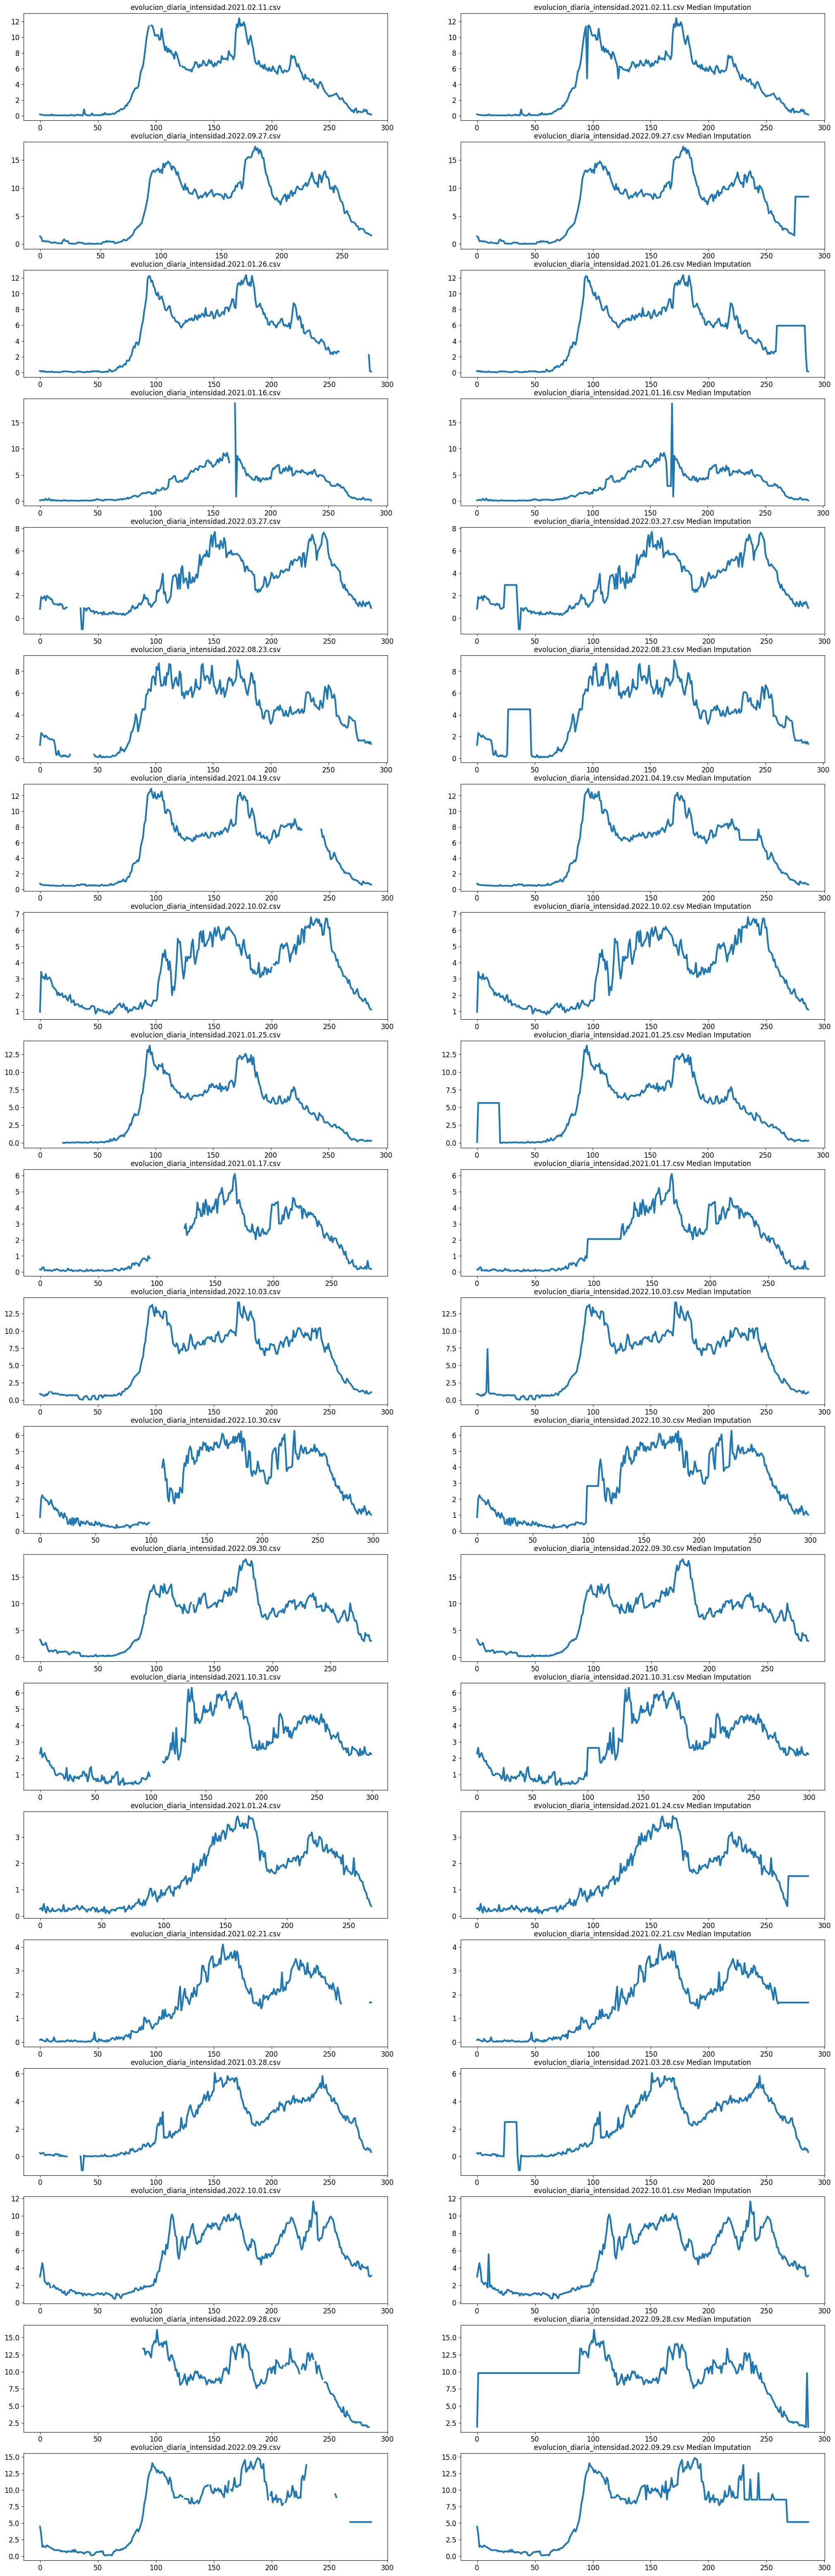

In [8]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))

'''
for l in lista:
    df = pd.read_csv(directory+"/"+l)
    df = df.loc[:,["intensidad"]]

plt.plot(df, color='blue')
plt.show()
'''

for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["ocupacion"]]
    newdf=df.fillna(df.median())






    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' Median Imputation')




plt.show()


 Mean imputation

In [17]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))



for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["intensidad  "]]
    newdf=df.fillna(df.mean())




    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' Mean Inputation')




plt.show()

Next Observation Carried Backward (NOCB)

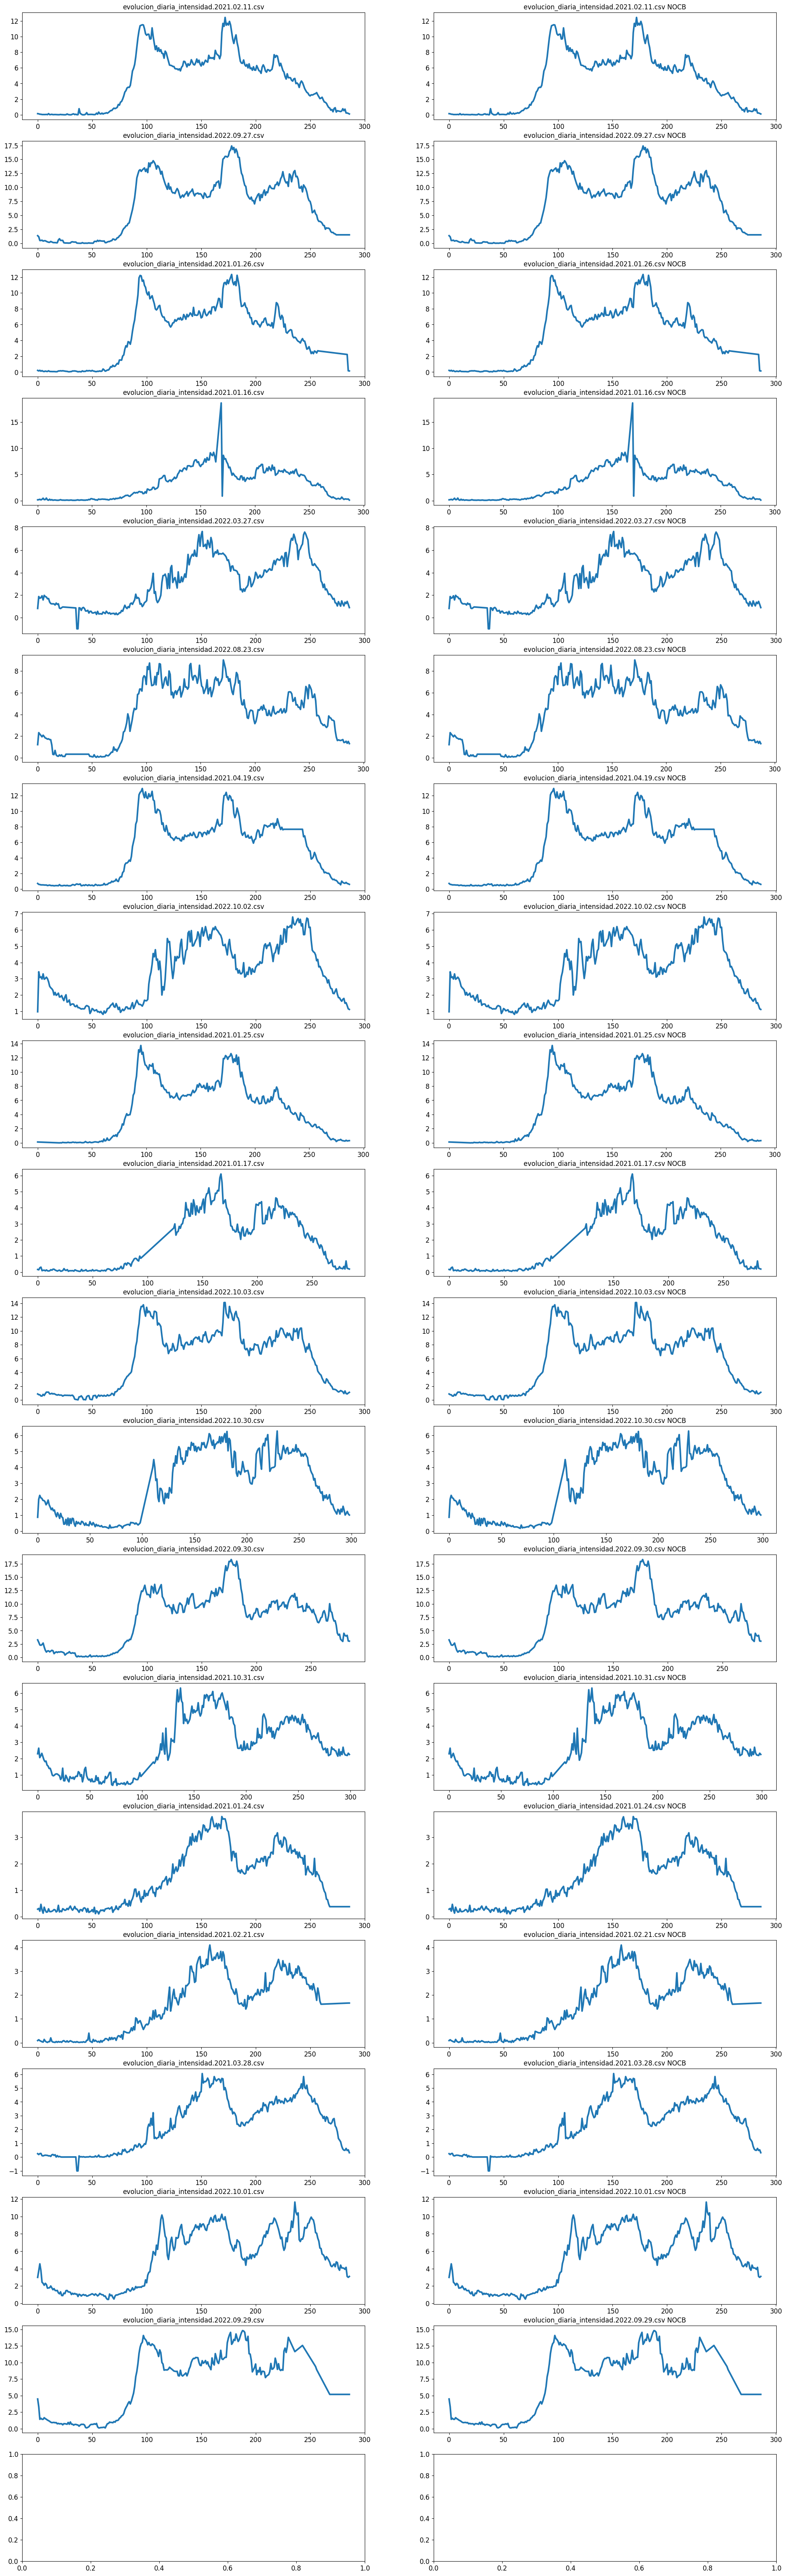

In [7]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,85))


'''
for l in lista:
    df = pd.read_csv(directory+"/"+l)
    df = df.loc[:,["intensidad"]]

plt.plot(df, color='blue')
plt.show()
'''

for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["ocupacion"]]
    newdf=df.fillna(method ='ffill')




    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' NOCB')




plt.show()

In [121]:
directory='./intensOcupation'
file=open(directory+'/evolucion_diaria_intensidad.2021.01.17.csv','r').readlines()
fileW=open(directory+'/datAxes.csv','w+')
fileW.write('time,value\n')
for i in range(1,len(file)):
    lineS=file[i].split(',')
    fileW.write(lineS[0]+',0'+'\n')
    
    
    